### 9. Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model.

In [110]:
# I will just use the iris dataset with petal length and width 
# to classify flowers as Iris virginica or not
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [111]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [112]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [113]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target # Iris virginica

In [114]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [115]:
print(f"Dataset length: {len(X)}")
print(f"Labels length: {len(y)}")

Dataset length: 100
Labels length: 100


In [116]:
# Scaling the inputs and running a few different models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

linear_svc_clf = LinearSVC(C=1, random_state=42)
linear_svc_clf.fit(X_scaled, y)

svc_clf = SVC(C=1, random_state=42, kernel="linear")
svc_clf.fit(X_scaled, y)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_scaled, y)



/Users/tevinachong/Documents/Courses/hands-on-ml/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SGDClassifier(random_state=42)

In [117]:
# Testing out each model on a new instance
X_test_instance = [[5.5, 1.7]]

print(f"Linear SVC prediction: {linear_svc_clf.predict(X_test_instance)}")
print(f"SVC prediction: {svc_clf.predict(X_test_instance)}")
print(f"SGD Classifier prediction: {sgd_clf.predict(X_test_instance)}")

Linear SVC prediction: [1]
SVC prediction: [1]
SGD Classifier prediction: [1]


In [118]:
# Okay, they all have same prediction. Good.

print("Test Instance distance from the decision boundary for: ")
print(f"\t - Linear SVC: {linear_svc_clf.decision_function(X_test_instance)}")
print(f"\t - SVC: {svc_clf.decision_function(X_test_instance)}")
print(f"\t - SGD Classifier: {sgd_clf.decision_function(X_test_instance)}")


Test Instance distance from the decision boundary for: 
	 - Linear SVC: [6.62975393]
	 - SVC: [7.67138333]
	 - SGD Classifier: [66.83600354]


In [121]:
import matplotlib.pyplot as plt

##### TODO: CHECK AURELIEN'S ANSWER TO PLOT DECISION BOUNDARY
def compute_decision_boundary(model, scaler):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

def plot_boundaries(linear_svc_line, svc_line, sgd_line):
    # Plot all three decision boundaries
    plt.figure(figsize=(11, 4))
    plt.plot(linear_svc_line[:, 0], linear_svc_line[:, 1], "k:", label="LinearSVC")
    plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
    plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc="upper center")
    plt.axis([0, 7, 0, 2])
    plt.grid()

    plt.show()

/Users/tevinachong/Documents/Courses/hands-on-ml/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


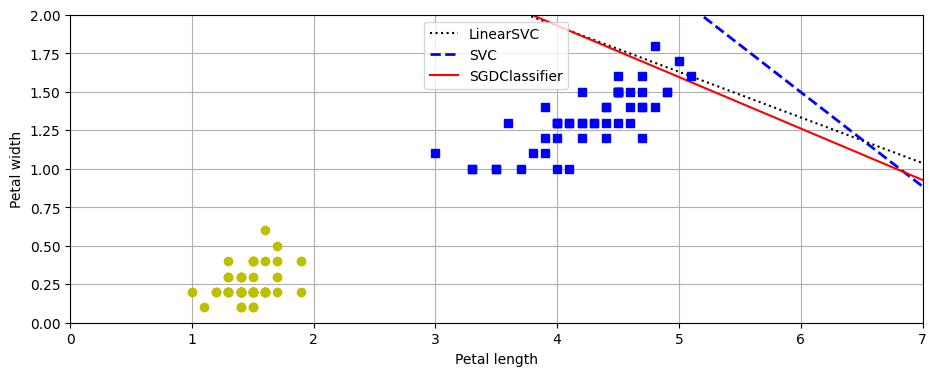

In [122]:
linear_svc_line = compute_decision_boundary(linear_svc_clf.fit(X, y), std_scaler)
svc_line = compute_decision_boundary(svc_clf.fit(X, y), std_scaler)
sgd_line = compute_decision_boundary(sgd_clf.fit(X, y), std_scaler)

plot_boundaries(linear_svc_line, svc_line, sgd_line)

In [127]:
# We can see it does a terrible job.
# For instance, let us test on an example that should clearly be versicolor

X_obvious_versicolor = [[4, 1.4]] # very much in that versicolor cluster
svc_clf.predict(X_obvious_versicolor)


array([1])